<a href="https://colab.research.google.com/github/tomaskrupa/machine_learning/blob/main/titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn import svm, tree, linear_model, neighbors, ensemble
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from xgboost import XGBClassifier

from typing import List

# 1. Load the data

In [577]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [578]:
df_train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning Projekty/3_titanic/train.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning Projekty/3_titanic/test.csv")
df_train.shape, df_test.shape

((891, 12), (418, 11))

*   **PassengerId** is the unique id of the row and it doesn't have any effect on target
*   **Survived** is the target variable we are trying to predict (0 or 1):
  *   1 = Survived
  *   0 = Not Survived
* **Pclass**  (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
  * 1 = Upper Class
  * 2 = Middle Class
  * 3 = Lower Class
* **Name** - passenger name
* **Sex** - passenger sex
* **Age** - age of the passenger
* **SibSp** is the total number of the passengers' siblings and spouse
* **Parch** is the total number of the passengers' parents and children
* **Ticket** is the ticket number of the passenger
* **Fare** is the passenger fare
* **Cabin** is the cabin number of the passenger
* **Embarked** is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton 




# 2. Initial Data Exploration

In [579]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [580]:
df_train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S


In [581]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Z tréninkových dat výše vyplývá, že:
* Celkem přežilo 38,38 % cestujících 
* Většina lidí cestuje samostatně
* 64,76 % cestujících jsou muži
* Pole "Ticket" obsahuje duplicity (23,57 %) - na jeden lístek může cestovat více lidí
* Pole "Cabin" obsahuje duplicity (27,94 %)

In [582]:
def barplot_feature_vs_target(feature:str, figsize:tuple=(7,5)):
  """Plots a barplot with survival rate for the input feature"""
  fig = plt.figure(figsize=figsize)
  sns.barplot(data=df_train, x=feature, y="Survived", ci=None).set_title(f"{feature} vs Survived")
  plt.show()

def get_feature_survival_rate_table(feature:str) -> pd.DataFrame:
  df_survived = df_train[[feature, "Survived"]].groupby([feature],as_index=False).agg(
      survival_rate = ("Survived", "mean"),
      no_of_passengers = ("Survived", "count"),
      total_survived = ("Survived", "sum")
  )
  df_survived = df_survived.sort_values("survival_rate", ascending=False).style.background_gradient(subset=["survival_rate", "total_survived"])
  
  display(df_survived)
  return df_survived

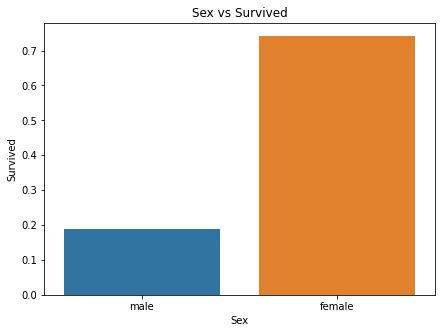

,Sex,survival_rate,no_of_passengers,total_survived
0,female,0.742038,314,233
1,male,0.188908,577,109


------------------------------------------------------------


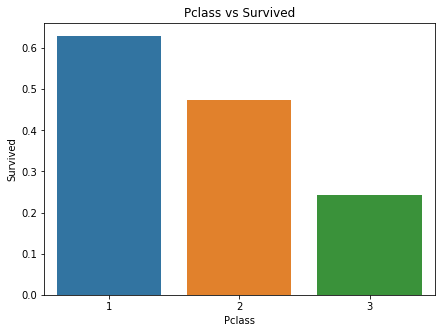

,Pclass,survival_rate,no_of_passengers,total_survived
0,1,0.629630,216,136
1,2,0.472826,184,87
2,3,0.242363,491,119


------------------------------------------------------------


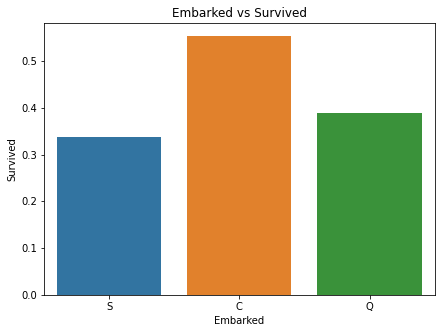

,Embarked,survival_rate,no_of_passengers,total_survived
0,C,0.553571,168,93
1,Q,0.389610,77,30
2,S,0.336957,644,217


------------------------------------------------------------


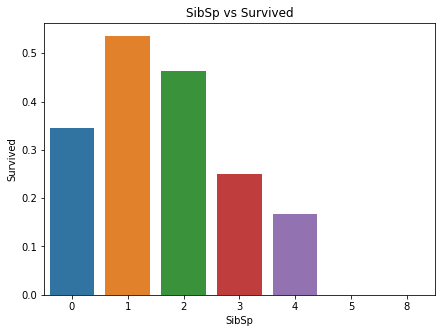

,SibSp,survival_rate,no_of_passengers,total_survived
1,1,0.535885,209,112
2,2,0.464286,28,13
0,0,0.345395,608,210
3,3,0.250000,16,4
4,4,0.166667,18,3
5,5,0.000000,5,0
6,8,0.000000,7,0


------------------------------------------------------------


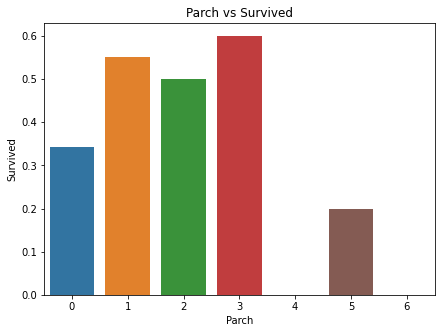

,Parch,survival_rate,no_of_passengers,total_survived
3,3,0.600000,5,3
1,1,0.550847,118,65
2,2,0.500000,80,40
0,0,0.343658,678,233
5,5,0.200000,5,1
4,4,0.000000,4,0
6,6,0.000000,1,0


------------------------------------------------------------


In [583]:
categorical_features = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for feature in categorical_features:
  barplot_feature_vs_target(feature)
  get_feature_survival_rate_table(feature)
  print("-"*60)

In [584]:
def plot_histogram_feature_vs_target(feature:str, binwidth:int=None):
  """Plot histogram of survival by selected feature"""
  survived = df_train[df_train["Survived"] == 1][feature]
  dead = df_train[df_train["Survived"] == 0][feature]
  sns.histplot(data=df_train, x= feature, multiple="stack", palette=sns.color_palette(["red", "green"]), hue="Survived", binwidth=binwidth).set_title(f"Passenger Survival by {feature}")
  plt.ylabel("No of Passengers")
  plt.xticks(np.arange(start=min(df_train[feature]), stop=max(df_train[feature]), step=binwidth)) # sync ticks on x axis with histogram bins

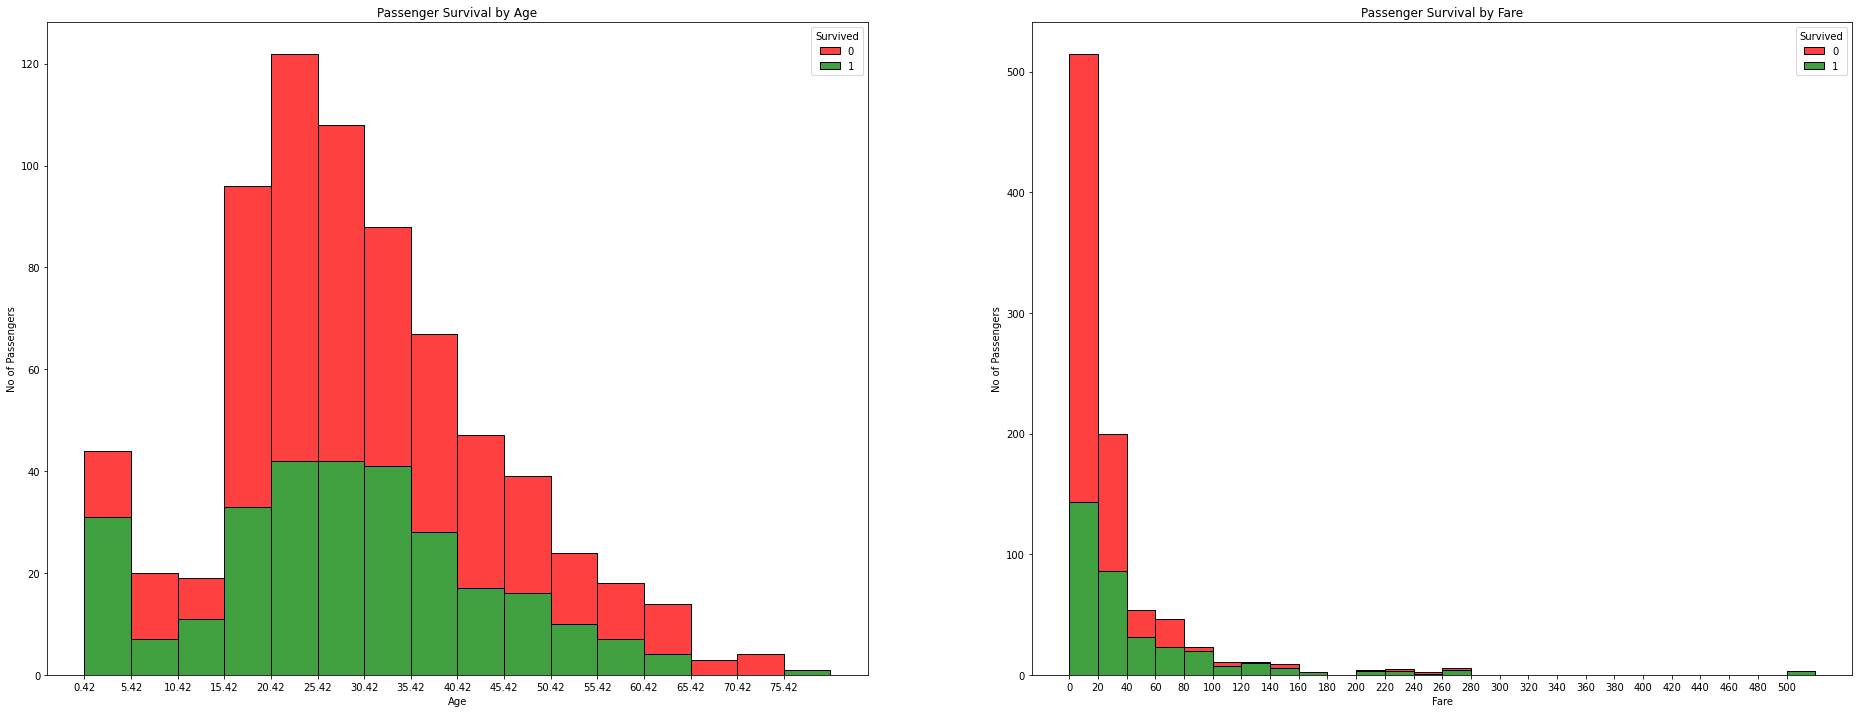

In [585]:
plt.figure(figsize=(50,12))
plt.subplot(131)
plot_histogram_feature_vs_target("Age", binwidth=5)
plt.subplot(132)
plot_histogram_feature_vs_target("Fare", binwidth=20)

* Největší šanci na přežití měly děti do 5 let (zajímavé je, že u další skupiny (děti od 5 do 10 let) survival rate poměrně prudce klesá)
* Survival rate stoupá s cenou lístku


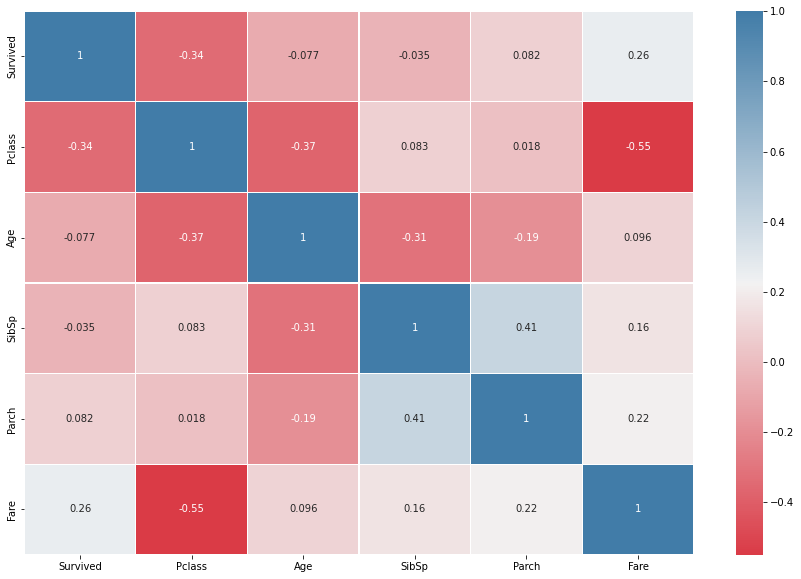

In [586]:
# plot correlation matrix
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(df_train.drop("PassengerId", axis=1).corr(), cmap=cmap, annot=True, linewidths=0.1, linecolor="white")

* Nejsilněší korelaci se závislou proměnnou pozorujeme u proměnných "Pclass" (třída) a "Fare" (cena lístku)
* Věk negativně korelován s "Pclass" --> starší lidé v lepší třídě?

# 3. Data Cleaning

Fáze čištění dat obecně sestává ze 4 kroků:
1. Correcting - oprava/nahrazení zjevně chybných hodnot a odlehlých hodnot 
(outliers);
2. Completing - doplnění chybějících hodnot;
3. Converting - konverze jednotlivých proměnných na správné datové typy pro další kalkulace (například one-hot encoding, tedy nahrazení kategorických proměnných číslenými);
4. Scaling -  škálování číselných hodnot (normalizace). 

In [587]:
# create list of datasets, so we can apply changes to both train and test data easily
datasets = [df_train, df_test]

In [588]:
def get_missing_values(df:pd.DataFrame) -> pd.DataFrame:
  """Calculates total number of missing values and percenatge of missing values per dataframe column"""
  total_missing = df.isnull().sum().sort_values(ascending=False)
  percent_missing = total_missing/len(df)
  df_missing = pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])
  return df_missing

In [589]:
print("Train columns with null values")
display(get_missing_values(df_train))
print("-"*30)
print()
print("Test columns with null values")
display(get_missing_values(df_test))

Train columns with null values


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


------------------------------

Test columns with null values


,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


Ze statistiky chybějících hodnot výše je jasně vidět, že nejvíce missing values obsahuje pole Cabin (téměř 80% v training i testing setu). Pole **Cabin tedy droppnu**

**Age -** Mohu nějak rozdělit do skupin psažéry, kteří nemají vyplněný věk? -->

Podle titulu ve jméně mohu rozdělit **ženy** na: 


*   Miss - svobodná
*   Mrs. - vdaná

a **muže** na:


*   Master - nezletilý - do 18 let
*   Mr. - 18 a více let

Jakmille vytvoříme patřičné proměnné, mohu na jejich základě rozdělit muže a ženy do skupin, pro které následně vypočítám median a dosadím jej místo chybějících hodnot.

**Embarked** - použiju modus

**Fare** - použiju průměr dané třídy (Pclass)

In [590]:
def get_substring_between_2_chars(string:str, start_char:str, end_char:str) -> str:
  return string.split(start_char)[1].split(end_char)[0]

def add_title(df:pd.DataFrame):
  df["title"] = None
  for row in range(len(df)):
    df["title"].iloc[row] = get_substring_between_2_chars(string=df.iloc[row].Name, start_char=", ", end_char=".")
  # if passenger title is not one of the 4 main ones ("Mrs", "Miss", "Mr", "Master"), label it as "Other"
  df["title"] = np.where(
      df["title"].isin(["Mrs", "Miss", "Mr", "Master"]), 
      df["title"],
      "Other"
  )

In [591]:
# add passenger title extracted from his name to both training and testing data
for dataset in datasets:
  add_title(dataset)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


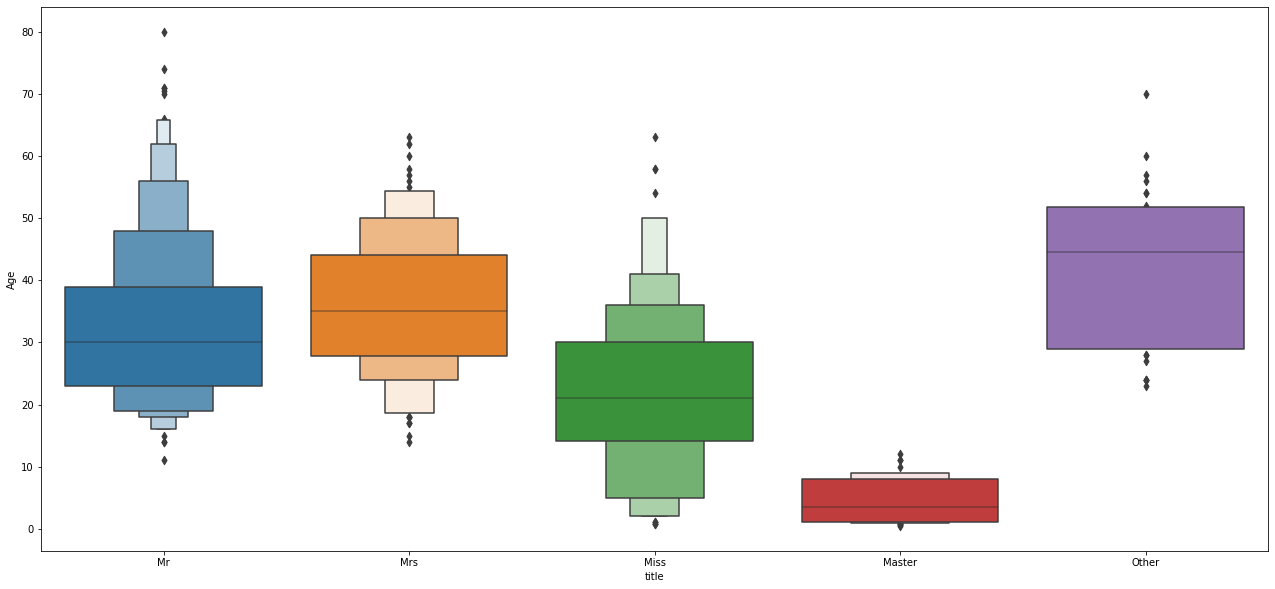

In [592]:
# explore age by passenger title
fig = plt.figure(figsize=(22,10))
sns.boxenplot(x="title", y="Age", data=df_train)

In [593]:
df_age_stats = df_train[["Age", "title"]].groupby(["title"], as_index=False).agg(
    min_age = ("Age", "min"),
    max_age = ("Age", "max"),
    median_age = ("Age", "median"),
    mean_age = ("Age", "mean"),
    no_of_passengers = ("Age", "count")
)
df_age_stats.sort_values("no_of_passengers", ascending=False)

,title,min_age,max_age,median_age,mean_age,no_of_passengers
2,Mr,11.00,80.0,30.0,32.368090,398
1,Miss,0.75,63.0,21.0,21.773973,146
3,Mrs,14.00,63.0,35.0,35.898148,108
0,Master,0.42,12.0,3.5,4.574167,36
4,Other,23.00,70.0,44.5,42.384615,26


Z vizuálů výše jde vidět, že mužský titul Master se používá pro děti do 12 let, takže u můžů s tímto titulem a chybějící hodnotou pro věk můžeme poměrně přesně odhadnout a doplnit věk. 

U žen a titulu Miss to tak jednoznačné není, protože tento titul se váže na rodinný status a ne přímo na věk, ačkoli jistou korelaci tady můžeme i přes to pozorovat. Median věku pro Miss (svobodná) je 21 let zatímco pro Mrs. (vdaná) je to 35. Jedná se o relativně velký rozdíl a jsme tedy schopni výrazně zpřesnit odhad chybějících hodnot pro věk, pokud známe titul ve jméně pasažéra.

In [594]:
def fill_missing_value_by_category(df:pd.DataFrame, column_to_fill:str, category_column:str, strategy:str="median"):
  """
  Fills missing values for a certain feature by a metric (mean, median...) calculated based on some additional grouping.
  Goal here is to guess missing values more precisely than just imputing a value calculated based on the whole dataset.
  """
  allowed_strategies = ["median", "mean"]
  if strategy not in allowed_strategies:
    raise ValueError(f"Only these values for strategy are allowed: {allowed_strategies}, \n you inputted: {strategy}")

  grouped_metric = None
  if strategy == "median":
    # get median grouped by some category
    grouped_metric = df_train.groupby([category_column])[column_to_fill].median()
  elif strategy == "mean":
    # get mean grouped by some category
    grouped_metric = df_train.groupby([category_column])[column_to_fill].mean()
  
  # fill missing values
  df[column_to_fill] = df[column_to_fill].combine_first(df[category_column].map(grouped_metric))



In [595]:
def handle_missing_values(df:pd.DataFrame):
  """Wrapper function that imputes all the missing data"""
  
  # fill missing values for Age
  fill_missing_value_by_category(df, column_to_fill="Age", category_column="title")

  # fill missing values for Fare
  fill_missing_value_by_category(df, column_to_fill="Fare", category_column="Pclass", strategy="mean")

  # fill missing values for Embarked
  df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [596]:
# handle missing values and create some new features that might be useful
for dataset in datasets:
  handle_missing_values(dataset)

  # create new features
  dataset["family_size"] = dataset["SibSp"] + dataset["Parch"] + 1
  dataset["is_alone"] = np.where(dataset["family_size"] > 1, 0, 1)
  # dataset["fare_bin"] = pd.cut(df_train["Fare"], bins=25, precision=0)
  dataset["fare_bin_encoded"] = pd.cut(df_train["Fare"], bins=25, precision=0, labels=False) # if labels=False, returns only integer indicators of the bins
  # dataset["age_bin"] = pd.cut(df_train["Age"], bins=15, precision=0)
  dataset["age_bin_encoded"] = pd.cut(df_train["Age"], bins=15, precision=0, labels=False)

  # drop Cabin field (too many missing values, can't really guess the missing values)
  # also drop Name and Ticket, as those features are no longer needed for further analysis
  dataset.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [597]:
print("Train columns with null values")
display(get_missing_values(df_train))
print("-"*30)
print()
print("Test columns with null values")
display(get_missing_values(df_test))

Train columns with null values


,Total,Percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0
title,0,0.0


------------------------------

Test columns with null values


,Total,Percent
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0
title,0,0.0
family_size,0,0.0


In [598]:
# one-hot encode categorical variables
categories = ["Sex", "Embarked", "title"]
df_train = pd.concat([df_train, pd.get_dummies(df_train[categories])], axis=1)
df_train.drop(categories, axis=1, inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test[categories])], axis=1)
df_test.drop(categories, axis=1, inplace=True)

In [599]:
# drop passenger id from training data (it is not usable for analysis)
df_train.drop("PassengerId", axis=1, inplace=True)

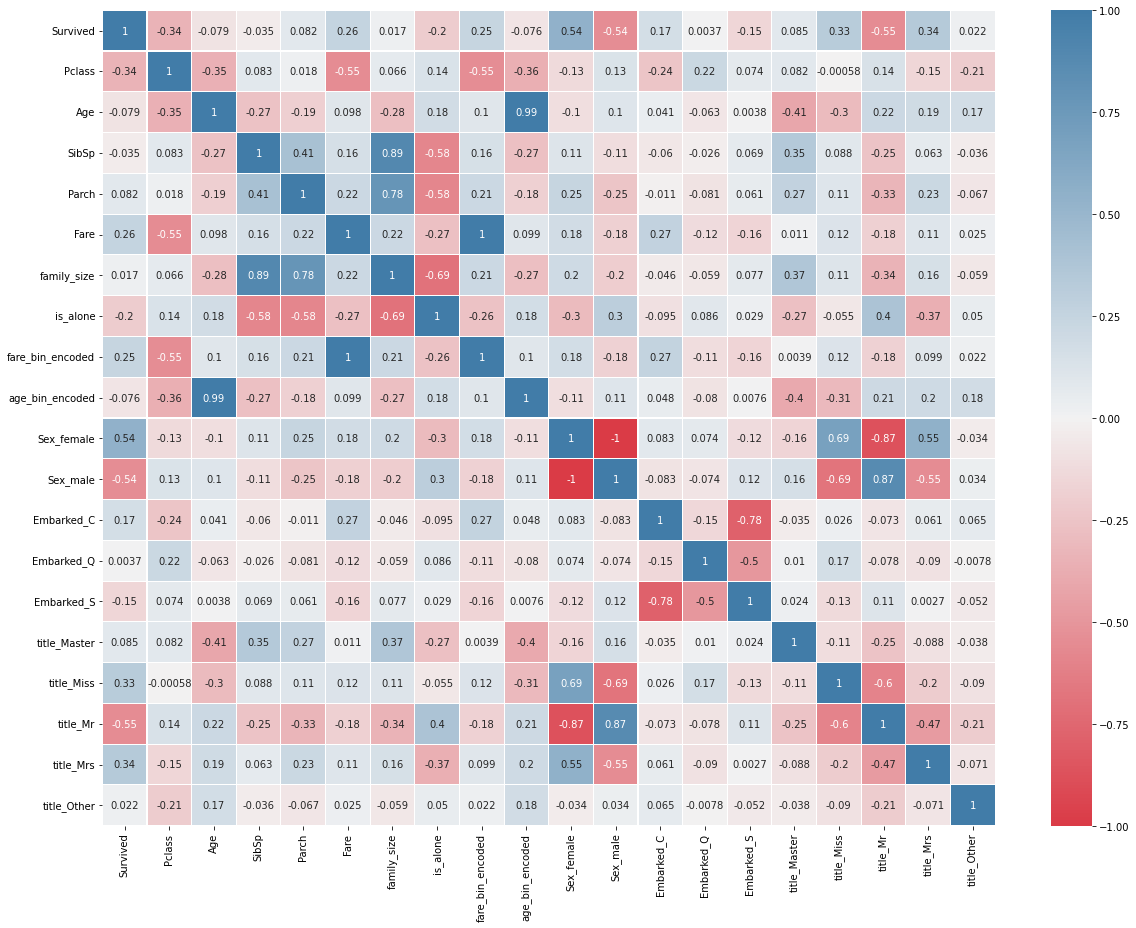

In [600]:
# plot correlation matrix based on cleaned data
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(df_train.corr(), cmap=cmap, annot=True, linewidths=0.1, linecolor="white")

# 4. Model Selection

In [619]:
# define list of classifiers that will be used to predict, if a passenger survived
classifiers = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    XGBClassifier(),
    svm.SVC(kernel="linear"),
    neighbors.KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
]

In [611]:
X_train = df_train.drop("Survived", axis=1)
test_passenger_id = df_test["PassengerId"]
y_train = df_train["Survived"]
X_test = df_test.drop("PassengerId", axis=1)
X_test

,Pclass,Age,SibSp,Parch,Fare,family_size,is_alone,fare_bin_encoded,age_bin_encoded,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
0,3,34.5,0,0,7.8292,1,1,0,4,0,1,0,1,0,0,0,1,0,0
1,3,47.0,1,0,7.0000,2,0,3,7,1,0,0,0,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,4,0,1,0,1,0,0,0,1,0,0
3,3,27.0,0,0,8.6625,1,1,2,6,0,1,0,0,1,0,0,1,0,0
4,3,22.0,1,1,12.2875,3,0,0,6,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,1,1,0,5,0,1,0,0,1,0,0,1,0,0
414,1,39.0,0,0,108.9000,1,1,0,8,1,0,1,0,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,1,1,0,6,0,1,0,0,1,0,0,1,0,0
416,3,30.0,0,0,8.0500,1,1,1,6,0,1,0,0,1,0,0,1,0,0


In [615]:
def cross_validate_classifiers(X_train, X_test, y_train, classifiers:List, nfolds:int=10):
  """ 
  Goal of this function is to evaluate all provided models based on classification accuracy
  Returns 2 dataframes:
    1) df_accuracy - contains accuracy statistics for each model
    2) df_predictions - contains predicted target for testing data 
  """
  X = X_train.to_numpy()
  y = y_train.to_numpy()

  df_predictions = pd.DataFrame()

  # create table to compare model accuracy metrics
  df_accuracy = pd.DataFrame(columns = ["name", "parameters","train_accuracy_mean", "test_accuracy_mean" ,"runtime"])

  for i, classifier in enumerate(classifiers): 
    amodel_name = classifier.__class__.__name__
    df_accuracy.loc[i, "name"] = amodel_name
    df_accuracy.loc[i, "parameters"] = str(classifier.get_params())

    cv_results = model_selection.cross_validate(estimator=classifier, X=X, y=y, cv=nfolds, return_train_score=True)
    
    df_accuracy.loc[i, "runtime"] = cv_results["fit_time"].mean()
    df_accuracy.loc[i, "train_accuracy_mean"] = cv_results["train_score"].mean()
    df_accuracy.loc[i, "test_accuracy_mean"] = cv_results["test_score"].mean()

    # save predictions for testing data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    df_predictions[amodel_name] = y_pred
  
  df_accuracy.sort_values(by = ["test_accuracy_mean"], ascending = False, inplace = True)

  return df_accuracy, df_predictions


In [620]:
df_accuracy, df_predictions = cross_validate_classifiers(X_train, X_test, y_train,classifiers)

In [621]:
df_accuracy

,name,parameters,train_accuracy_mean,test_accuracy_mean,runtime
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.906473,0.840674,0.153275
5,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.883278,0.839538,0.061959
6,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.828533,0.82603,3.841944
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.840753,0.811486,0.129117
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.982167,0.810387,0.335936
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.96633,0.803608,0.036068
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.982167,0.794644,0.159942
9,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.982167,0.77779,0.001486
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.982167,0.776729,0.003683
7,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.818432,0.744157,0.000984


Text(0.5, 0, 'Accuracy Score (%)')

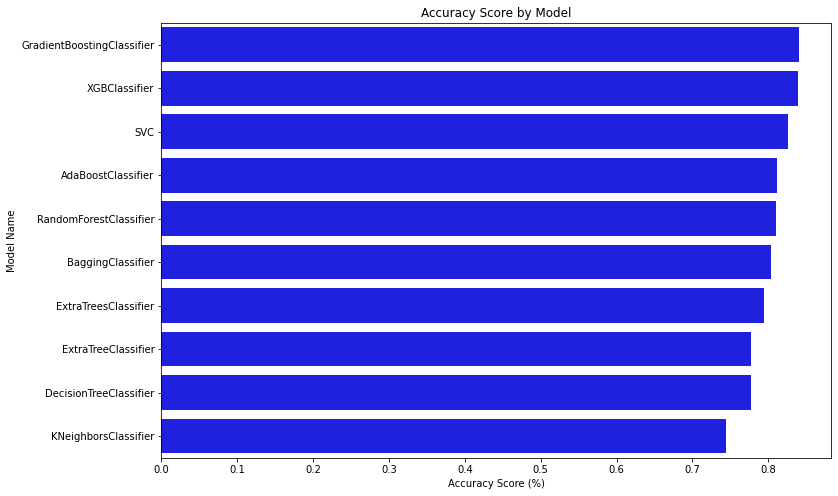

In [628]:
# plot testing accuracy by classifier
plt.figure(figsize=(12,8))
sns.barplot(x="test_accuracy_mean", y="name", data=df_accuracy, color = "b")
plt.title("Accuracy Score by Model")
plt.ylabel("Model Name")
plt.xlabel("Accuracy Score (%)")

In [635]:
# take best performing model predictions
y_pred = df_predictions["GradientBoostingClassifier"]
df_submission = pd.concat([test_passenger_id, y_pred], axis=1, keys=["PassengerId", "Survived"])
df_submission
# df_submission.to_csv("submission.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
